## Classification

In [1]:
import kagglehub
import os
import pandas as pd
# Download latest version to the specified directory
# path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

path = "/home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13"

print(f"Path to dataset files: {path}")
print(f"List of files in the dataset: {os.listdir(path)}")

/home/leon/.cache/pypoetry/virtualenvs/nlp-linkedin-offers-Dd-EBZf7-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13
List of files in the dataset: ['companies', 'postings.csv', 'jobs', 'mappings']


In [2]:
postings_path = path + "/postings.csv"
postings_df = pd.read_csv(postings_path)

job_skills_path = path + "/jobs/job_skills.csv"
job_skills_df = pd.read_csv(job_skills_path)

skills_mapping_path = path + "/mappings/skills.csv"
skills_mapping_df = pd.read_csv(skills_mapping_path)

#### Clean the textual data

In [33]:
import re

# Nettoyage de base
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d{10,}', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the clean_text function and ASSIGN the result back
postings_df['description'] = postings_df['description'].astype('str').apply(lambda x: clean_text(x))
postings_df['title'] = postings_df['title'].astype('str').apply(lambda x: clean_text(x))

### Data Aggregation

In [3]:
# Add skill column to the postings dataframe
# We use the job_id to join the job_skills_df with postings_df
job_skills_df[['job_id', 'skill_abr']].dropna(inplace=True)
postings_df = postings_df.merge(job_skills_df[['job_id', 'skill_abr']], on='job_id', how='left')

In [7]:
postings_df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,skill_abr
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,MRKT
1,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,SALE
2,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,HCPR
3,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,MGMT
4,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,MNFC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207526,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0,SALE
207527,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0,BD
207528,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,BD
207529,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,SALE


### Data analysis

Number of rows: 207531
Number of columns: 32
count     205778
unique        35
top           IT
freq       25256
Name: skill_abr, dtype: object


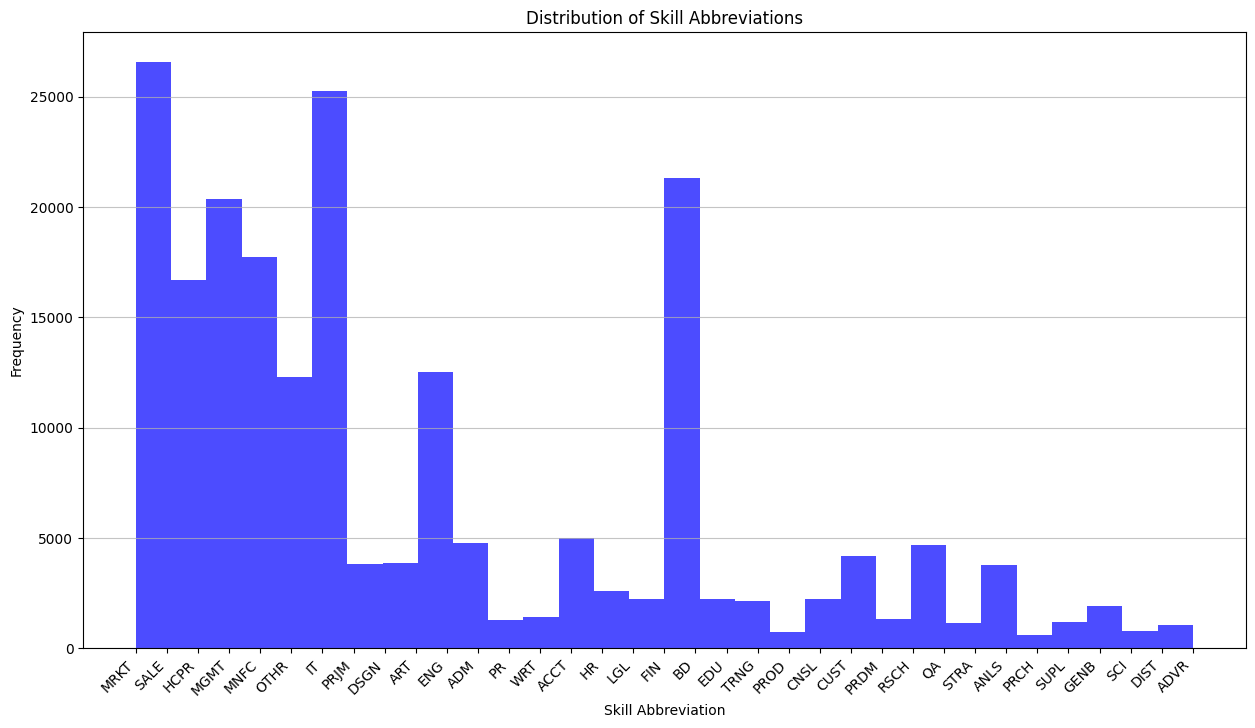

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer


# Quick overview of the dataset
print(f"Number of rows: {postings_df.shape[0]}")
print(f"Number of columns: {postings_df.shape[1]}")

# Basic statistics on the views column
print(postings_df["skill_abr"].describe())

# Plotting the distribution of the views column
plt.figure(figsize=(15, 8))
plt.hist(postings_df["skill_abr"].dropna(), bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Skill Abbreviations")
plt.xlabel("Skill Abbreviation")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

### Correlation with different columns

**Interesting columns:**
- company_name
- title
- description
- location
- views
- formatted_work_type
- skills_desc
- normalized_salary

/tmp/ipykernel_5279/2630363738.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df = test_df.groupby('skill_abr', group_keys=False).apply(remove_top_5_percent)
/tmp/ipykernel_5279/2630363738.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(salary_data, labels=valid_skills)


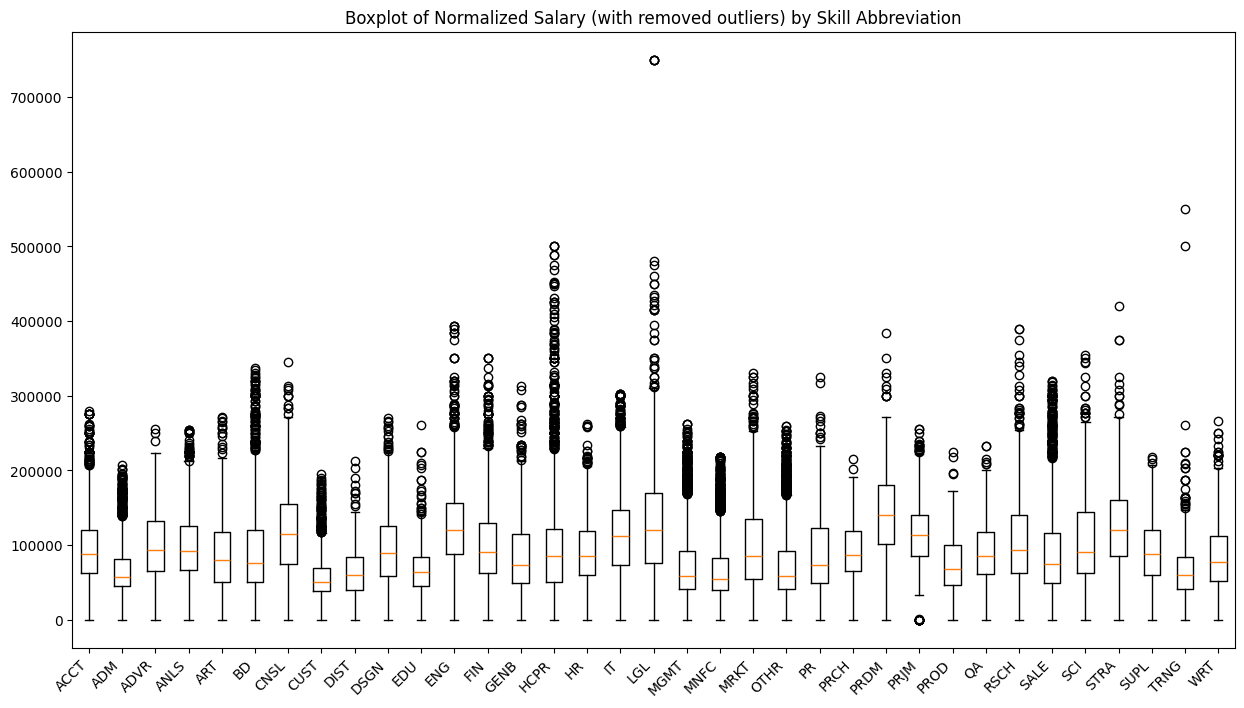

In [62]:
# Plot the correlation chart between the skills and the normalized salary
test_df = postings_df.copy()
test_df = test_df.dropna(subset=['normalized_salary', 'skill_abr'])

# Drop normalized_salaries with 0
test_df = test_df[test_df['normalized_salary'] > 0]

# Remove the top 5% of salaries per skill
def remove_top_5_percent(group):
    upper_limit = group['normalized_salary'].quantile(0.992)
    return group[group['normalized_salary'] <= upper_limit]

test_df = test_df.groupby('skill_abr', group_keys=False).apply(remove_top_5_percent)
# Print data quality checks
# print("Data quality check:")
# print(f"Number of NaN values in normalized_salary: {test_df['normalized_salary'].isna().sum()}")
# print(f"Number of NaN values in skill_abr: {test_df['skill_abr'].isna().sum()}")
# print(f"Total number of rows: {len(test_df)}")

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Get unique skills and ensure we have enough data for each
skills = test_df['skill_abr'].unique()
salary_data = []
valid_skills = []

for skill in skills:
    skill_salaries = test_df[test_df['skill_abr'] == skill]['normalized_salary']
    if len(skill_salaries) > 5:
        salary_data.append(skill_salaries)
        valid_skills.append(skill)

# Create boxplot
bp = ax.boxplot(salary_data, labels=valid_skills)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot of Normalized Salary (with removed outliers) by Skill Abbreviation")
print()


#### Job Description Analysis

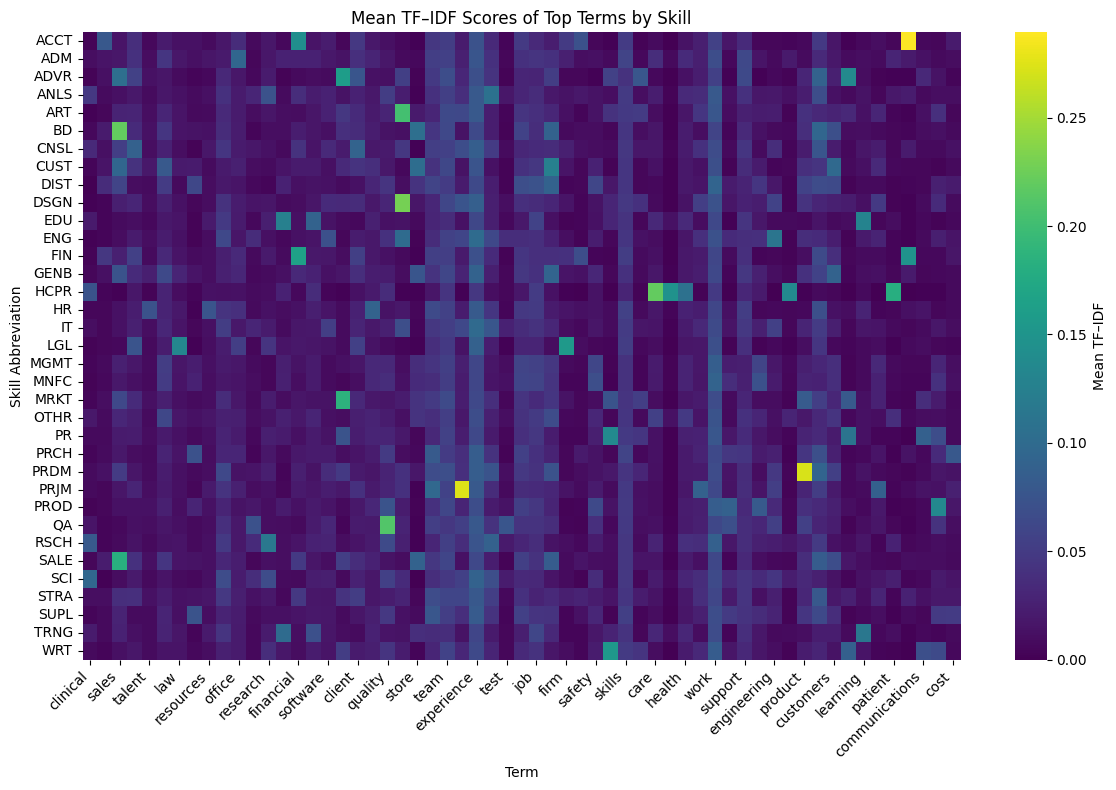

In [72]:
# Create a heatmap chart using TF-IDF as a vectorizer

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your DataFrame is called `df` and has cols "description" and "skill_abr"
# df = pd.read_csv("your_data.csv")  # or however you load it

# 1) Fit TF-IDF on all descriptions
vectorizer = TfidfVectorizer(
    max_features=500,      # limit to top 500 terms overall (tune as needed)
    stop_words='english',  # drop English stopwords
    ngram_range=(1,1),      # unigrams only; expand if you want bi‑grams etc.
    lowercase=True,      # lowercase all terms
)

postings_df['description'].dropna(inplace=True)  # Drop NaN descriptions
postings_df['description'] = postings_df['description'].astype(str)  # Ensure all descriptions are strings
tfidf_mat = vectorizer.fit_transform(postings_df['description'])

# 2) Build a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(
    tfidf_mat.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=postings_df.index
)

# 3) Attach skill labels and compute mean TF-IDF per skill
tfidf_df['skill_abr'] = postings_df['skill_abr']
skill_tfidf = tfidf_df.groupby('skill_abr').mean()

# 4) Select the top N terms per skill
top_n = 5
top_terms = []
for skill in skill_tfidf.index:
    top_terms += list(skill_tfidf.loc[skill].nlargest(top_n).index)
top_terms = list(set(top_terms))  # unique set of chosen terms

# 5) Subset the aggregated matrix to only those top terms
heatmap_data = skill_tfidf[top_terms]

# 6) Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    # annot=True,        # show the TF-IDF score in each cell
    fmt=".2f",         # two decimals
    cmap='viridis',    # or any seaborn/matplotlib palette you like
    cbar_kws={"label": "Mean TF–IDF"}
)
plt.title("Mean TF–IDF Scores of Top Terms by Skill")
plt.ylabel("Skill Abbreviation")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Same for title

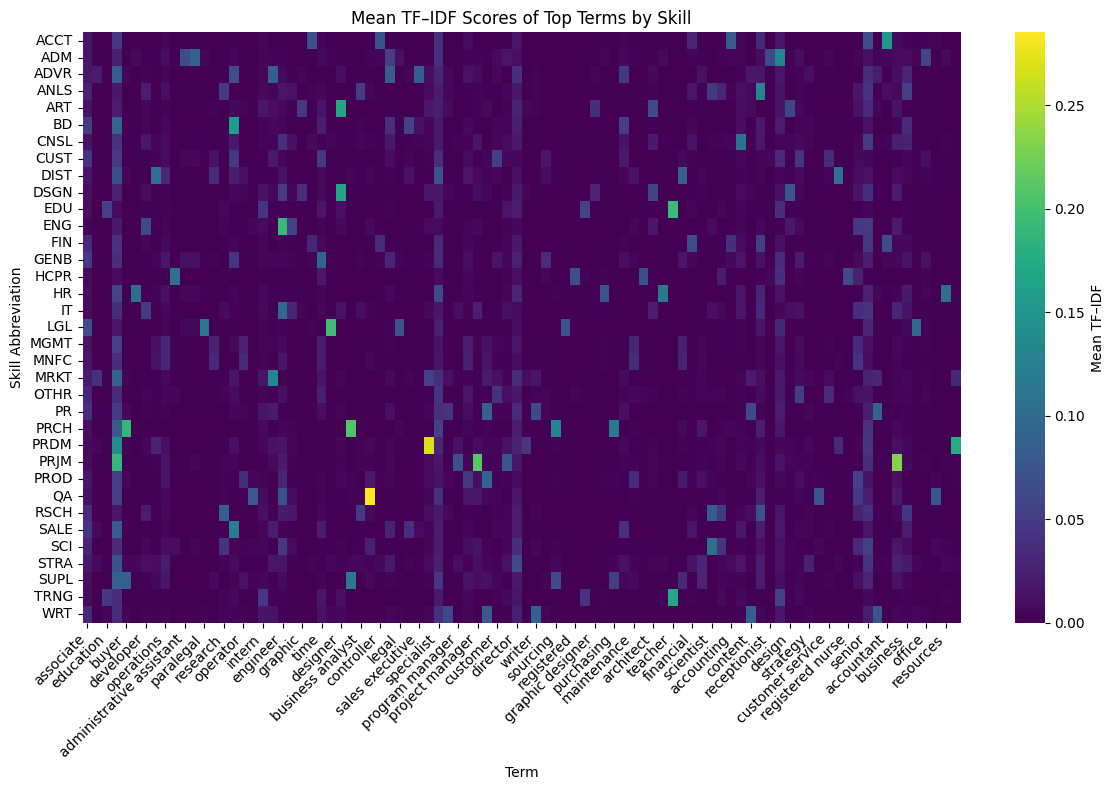

In [16]:
# Create a heatmap chart using TF-IDF as a vectorizer

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your DataFrame is called `df` and has cols "description" and "skill_abr"
# df = pd.read_csv("your_data.csv")  # or however you load it

# 1) Fit TF-IDF on all descriptions
vectorizer = TfidfVectorizer(
    max_features=1000,      # limit to top 500 terms overall (tune as needed)
    stop_words='english',  # drop English stopwords
    ngram_range=(1,2),      # unigrams only; expand if you want bi‑grams etc.
    lowercase=True,      # lowercase all terms
)

postings_df['title'].dropna(inplace=True)  # Drop NaN descriptions
postings_df['title'] = postings_df['title'].astype(str)  # Ensure all descriptions are strings
tfidf_mat = vectorizer.fit_transform(postings_df['title'])

# 2) Build a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(
    tfidf_mat.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=postings_df.index
)

# 3) Attach skill labels and compute mean TF-IDF per skill
tfidf_df['skill_abr'] = postings_df['skill_abr']
skill_tfidf = tfidf_df.groupby('skill_abr').mean()

# 4) Select the top N terms per skill
top_n = 5
top_terms = []
for skill in skill_tfidf.index:
    top_terms += list(skill_tfidf.loc[skill].nlargest(top_n).index)
top_terms = list(set(top_terms))  # unique set of chosen terms

# 5) Subset the aggregated matrix to only those top terms
heatmap_data = skill_tfidf[top_terms]

# 6) Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    # annot=True,        # show the TF-IDF score in each cell
    fmt=".2f",         # two decimals
    cmap='viridis',    # or any seaborn/matplotlib palette you like
    cbar_kws={"label": "Mean TF–IDF"}
)
plt.title("Mean TF–IDF Scores of Top Terms by Skill")
plt.ylabel("Skill Abbreviation")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Word Cloud for the skills

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_skill_wordcloud(df, skill_abr, max_words=100, bg_color='white'):
    """
    Generates and displays a word cloud for all job descriptions
    associated with the given skill abbreviation.

    Parameters
    ----------
    df : pandas.DataFrame
        Must contain columns 'description' (text) and 'skill_abr' (categorical).
    skill_abr : str
        The skill abbreviation for which to build the word cloud.
    max_words : int, optional
        Maximum number of words to include in the cloud (default=100).
    bg_color : str, optional
        Background color for the word cloud (default='white').
    """
    # 1) Filter descriptions for the chosen skill
    texts = df.loc[df['skill_abr'] == skill_abr, 'description'].dropna().astype(str)
    if texts.empty:
        raise ValueError(f"No descriptions found for skill '{skill_abr}'")
    
    # 2) Concatenate into one large string
    corpus = " ".join(texts)
    
    # 3) Build the word cloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color=bg_color,
        stopwords=STOPWORDS,
        max_words=max_words
    ).generate(corpus)
    
    # 4) Plot it
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud – Skill: {skill_abr}", fontsize=12)
    plt.tight_layout()
    plt.show()


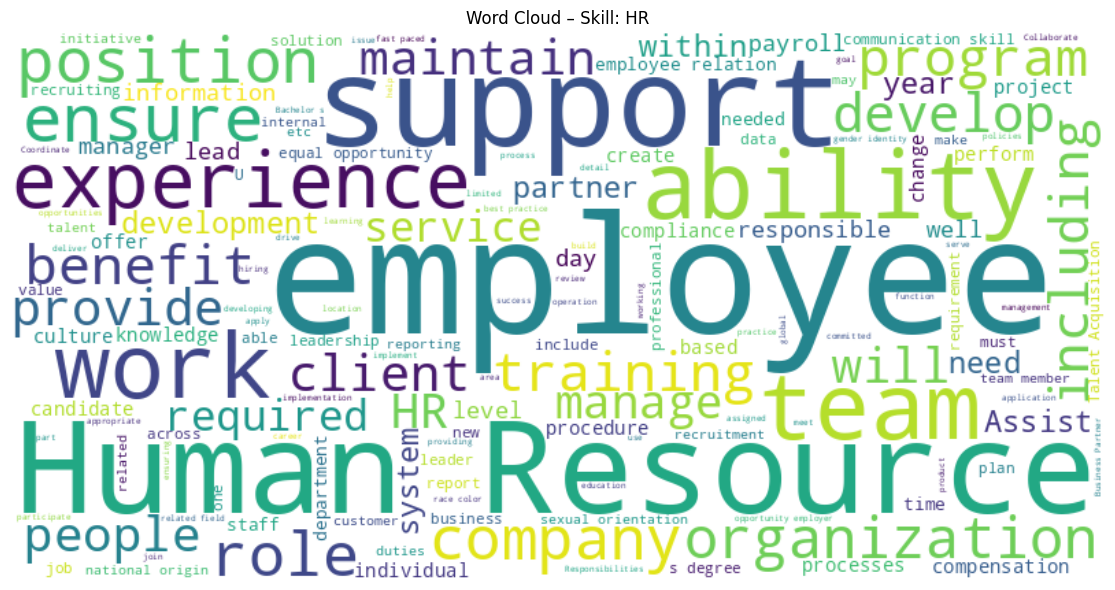

In [ ]:
plot_skill_wordcloud(postings_df, skill_abr='HR', max_words=150)

---
### Classification with TF-IDF using "description" column

#### Multinomial Naive Bayes

              precision    recall  f1-score   support

        ACCT      0.453     0.584     0.510      1017
         ADM      0.411     0.359     0.383       938
        ADVR      0.390     0.339     0.363       121
        ANLS      0.155     0.023     0.041       767
         ART      0.220     0.101     0.138       288
          BD      0.419     0.242     0.307      2739
        CNSL      0.264     0.086     0.130       428
        CUST      0.385     0.174     0.240       816
        DIST      0.234     0.278     0.254        79
        DSGN      0.291     0.091     0.138       452
         EDU      0.371     0.592     0.456       426
         ENG      0.383     0.277     0.321      2470
         FIN      0.313     0.358     0.334      1601
        GENB      0.442     0.249     0.319       381
        HCPR      0.712     0.892     0.792      3308
          HR      0.594     0.492     0.538       496
          IT      0.398     0.559     0.465      5079
         LGL      0.703    

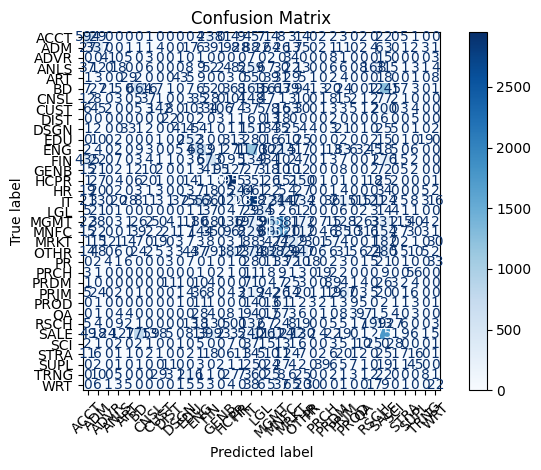

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor, LinearRegression, Ridge, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer
from sklearn.utils.class_weight import compute_class_weight


cleaned_df = postings_df.dropna(subset=['description', 'skill_abr'])
X = cleaned_df["description"].astype(str).to_numpy()  # Convert to string
y = cleaned_df["skill_abr"].to_numpy()


# Split data (X = text, y = views)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2, 
    random_state=42
)

# sample_weights = compute_class_weight("balanced", y_train)

# Define the text preprocessing pipeline
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 2),
        min_df=5,
        max_df=0.8
    )),
])

model_pipeline = Pipeline([
    ('nb', MultinomialNB(alpha=0.01)),
    ])

# Full pipeline
full_pipeline = Pipeline([
    ('text_preprocessing', text_pipeline),
    ('nb', model_pipeline)
])

# X_train_dense = text_pipeline.named_steps['tfidf'].fit_transform(X_train).toarray()
# X_test_dense = text_pipeline.named_steps['tfidf'].transform(X_test).toarray()

# Train
full_pipeline.fit(X_train, y_train)

# Predict (automatically applies inverse Box-Cox)
y_pred = full_pipeline.predict(X_test)

# Round to integers (since views are counts)
# y_pred = np.round(y_pred).astype(int)

print(classification_report(y_test, y_pred, digits=3))

# Assuming you have y_test and y_pred from your model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', xticks_rotation=45, values_format="")
plt.title("Confusion Matrix")
plt.figsize=(16, 12)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [17]:
# Make a test prediction
test_description = 'You will work with money and paper'
test_description = np.array([test_description])
# Predict the skill abbreviation
predicted_skill = full_pipeline.predict(test_description)
predicted_skill_proba = full_pipeline.predict_proba(test_description)
print(f"Predicted skill abbreviation: {predicted_skill}")

Predicted skill abbreviation: ['MGMT']


#### GridSearch optimisation

In [4]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer
from sklearn.utils.class_weight import compute_class_weight


cleaned_df = postings_df.dropna(subset=['description', 'skill_abr'])
X = cleaned_df["description"].astype(str).to_numpy()  # Convert to string
y = cleaned_df["skill_abr"].to_numpy()

# Split data (X = text, y = views)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2, 
    random_state=42
)

# sample_weights = compute_class_weight("balanced", y_train)

# Define the text preprocessing pipeline
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 2),
        min_df=5,
        max_df=0.8
    )),
])

model_pipeline = Pipeline([
    ('nb', MultinomialNB(alpha=0.01)),
    ])

# Full pipeline
full_pipeline = Pipeline([
    ('text_preprocessing', text_pipeline),
    ('nb', model_pipeline)
])

# Define the parameter grid
param_grid = {
    'text_preprocessing__tfidf__max_features': [5000, 10000],
    'text_preprocessing__tfidf__ngram_range': [(1, 1), (1, 2)],
    'text_preprocessing__tfidf__min_df': [1, 5, 10],
    'text_preprocessing__tfidf__max_df': [0.5, 0.8, 1.0],
    'nb__nb__alpha': [0.01, 0.1, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    scoring='f1_weighted',  # Use F1-weighted as the scoring metric
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=4 # Use all available cores
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Weighted Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', xticks_rotation=45, values_format="")
# plt.title("Confusion Matrix")
# plt.figsize=(16, 12)
# plt.tight_layout()
# plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END nb__nb__alpha=0.01, text_preprocessing__tfidf__max_df=0.5, text_preprocessing__tfidf__max_features=5000, text_preprocessing__tfidf__min_df=1, text_preprocessing__tfidf__ngram_range=(1, 1); total time= 1.0min
[CV] END nb__nb__alpha=0.01, text_preprocessing__tfidf__max_df=0.5, text_preprocessing__tfidf__max_features=5000, text_preprocessing__tfidf__min_df=1, text_preprocessing__tfidf__ngram_range=(1, 1); total time=  58.1s
[CV] END nb__nb__alpha=0.01, text_preprocessing__tfidf__max_df=0.5, text_preprocessing__tfidf__max_features=5000, text_preprocessing__tfidf__min_df=1, text_preprocessing__tfidf__ngram_range=(1, 1); total time= 1.0min
[CV] END nb__nb__alpha=0.01, text_preprocessing__tfidf__max_df=0.5, text_preprocessing__tfidf__max_features=5000, text_preprocessing__tfidf__min_df=1, text_preprocessing__tfidf__ngram_range=(1, 1); total time= 1.1min
[CV] END nb__nb__alpha=0.01, text_preprocessing__tfidf__max_df=0.5, t

---
### Classification using "description" and "title" column 

              precision    recall  f1-score   support

        ACCT      0.451     0.655     0.534       977
         ADM      0.495     0.484     0.490       954
        ADVR      0.300     0.350     0.323       120
        ANLS      0.223     0.134     0.167       791
         ART      0.233     0.248     0.240       310
          BD      0.414     0.474     0.442      2722
        CNSL      0.248     0.195     0.218       446
        CUST      0.384     0.239     0.295       841
        DIST      0.198     0.214     0.206        84
        DSGN      0.221     0.162     0.187       450
         EDU      0.347     0.585     0.436       426
         ENG      0.401     0.511     0.450      2393
         FIN      0.352     0.446     0.393      1594
        GENB      0.406     0.252     0.311       385
        HCPR      0.786     0.913     0.845      3293
          HR      0.617     0.724     0.666       550
          IT      0.495     0.393     0.438      5052
         LGL      0.670    

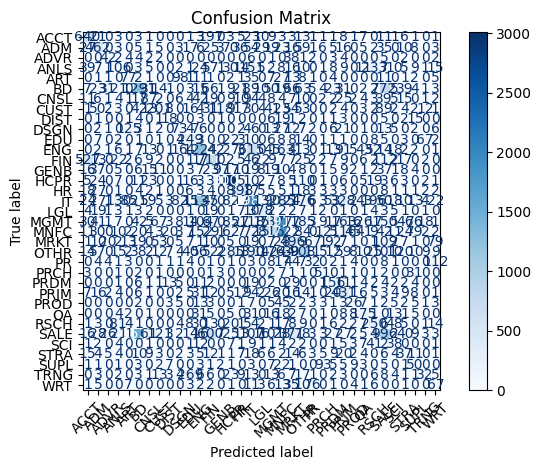

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor, LinearRegression, Ridge, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer


cleaned_df = postings_df.dropna(subset=['description', 'title', 'skill_abr'])
X = cleaned_df[["description", "title"]].astype(str) # Convert to string
y = cleaned_df["skill_abr"].to_numpy()


# Split data (X = text, y = views)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2, 
    random_state=42
)

# sample_weights = compute_class_weight("balanced", y_train)

# Define the text preprocessing pipeline
text_pipeline = ColumnTransformer([
    ('description_tfidf', TfidfVectorizer(
        max_features=10000,
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 3),
        min_df=5,
        max_df=0.8
    ), 'description'),
    ('title_tfidf', TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 2),
        min_df=1,
        max_df=0.7
    ), 'title'),
])

model_pipeline = Pipeline([
    ('nb', MultinomialNB(alpha=0.1)),
    ])

# Full pipeline
full_pipeline = Pipeline([
    ('text_preprocessing', text_pipeline),
    ('nb', model_pipeline)
])

# Train
full_pipeline.fit(X_train, y_train)

y_pred = full_pipeline.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

# Assuming you have y_test and y_pred from your model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', xticks_rotation=45, values_format="")
plt.title("Confusion Matrix")
plt.figsize=(16, 12)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [31]:
# Look at sample predictions
# print(X_test["title"])

results = pd.DataFrame({
    'description': X_test["description"],
    'title': X_test["title"],
    'actual': y_test,
    'predicted': y_pred
})
results['correct'] = results['actual'] == results['predicted']
results

,description,title,actual,predicted,correct
14442,What You'll Bring To The Team...\n\nAnswer pho...,Receptionist,ADM,ADM,True
145017,About Us – Momentum Worldwide\n\nMomentum is a...,"Senior Design Director, Experience Design",ART,DSGN,False
92347,This is our internal position looking for US C...,Director of Business Development (Federal),SALE,BD,False
94077,Foster Farms has been serving families since 1...,Complex Manager,MNFC,MGMT,False
29442,Title – Business Unit Manager > Manufacturing\...,Business Unit Manager > Manufacturing,SALE,MNFC,False
...,...,...,...,...,...
9779,"\nLiberty Cares\nWith Compassion\n****$5,000 S...",LICENSED PRACTICAL NURSE - ROYAL PARK REHABILI...,HCPR,HCPR,True
193043,We are looking for experienced or new grad Ech...,Echo Tech,HCPR,HCPR,True
143574,Broward Health North\n\nShift: Shift 3\n\nFTE:...,RN-Cardiac/Tele-$15K Sign-On-FT Nights-BHN-#7941,HCPR,HCPR,True
28096,"Job Description\n\nJob Description\n\n""A diffe...",PRN/PART TIME LPN Licensed Practical Nurse,HCPR,HCPR,True


/home/leon/.cache/pypoetry/virtualenvs/nlp-linkedin-offers-4RXahsWL-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/leon/.cache/pypoetry/virtualenvs/nlp-linkedin-offers-4RXahsWL-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/leon/.cache/pypoetry/virtualenvs/nlp-linkedin-offers-4RXahsWL-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

              precision    recall  f1-score   support

        ACCT      0.460     0.546     0.499      1017
         ADM      0.436     0.327     0.374       938
        ADVR      0.409     0.223     0.289       121
        ANLS      0.087     0.003     0.005       767
         ART      0.222     0.014     0.026       288
          BD      0.411     0.147     0.217      2739
        CNSL      0.348     0.037     0.068       428
        CUST      0.416     0.140     0.209       816
        DIST      0.348     0.203     0.256        79
        DSGN      0.297     0.042     0.074       452
         EDU      0.363     0.573     0.444       426
         ENG      0.389     0.209     0.272      2470
         FIN      0.313     0.359     0.334      1601
        GENB      0.459     0.247     0.321       381
        HCPR      0.697     0.906     0.788      3308
          HR      0.612     0.448     0.517       496
          IT      0.365     0.627     0.461      5079
         LGL      0.737    

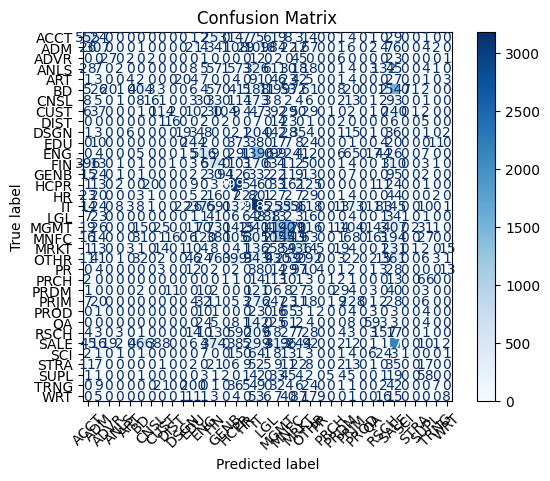

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
print(classification_report(y_test, y_pred, digits=3))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from your model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.figsize=(16, 12)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor, LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer


X = postings_df["description"].to_numpy()
y = postings_df["skill_abr"].to_numpy()

# Split data (X = text, y = views)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2, 
    random_state=42
)

# Define the text preprocessing pipeline
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=2500,
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 3),
        min_df=2,
        max_df=0.8
    )),
])

model_pipeline = Pipeline([
    ('regressor', LogisticRegression(
        max_iter=1000,
        C=1.0,
        penalty='l2',
        solver='saga',
        random_state=42
    )),
])

# Full pipeline
full_pipeline = Pipeline([
    ('text_preprocessing', text_pipeline),
    ('regressor', model_pipeline)
])

# X_train_dense = text_pipeline.named_steps['tfidf'].fit_transform(X_train).toarray()
# X_test_dense = text_pipeline.named_steps['tfidf'].transform(X_test).toarray()

# Train
full_pipeline.fit(X_train, y_train)

# Predict (automatically applies inverse Box-Cox)
y_pred = full_pipeline.predict(X_test)

# Round to integers (since views are counts)
# y_pred = np.round(y_pred).astype(int)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")

# Results
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head(10))
